# Кластеризація для ML/DL

### Завдання

До пункту видачі надійшли вироби з такими характеристиками: Всього виробів – 13000 одиниць, з них виготовлено на першому заводі — 8000 од., вагою 13 кг., зі стандартним відхиленням по вазі 0.5 кг.. На другому — 5000 од., вагою 12 кг., зі стандартним відхиленням по вазі 0.7 кг. Доля якісних виробів, вироблених на першому заводі, становить 0.85. Доля якісних виробів, вироблених на другому заводі 0,8.

Написати код, з використанням EM-алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб.

### Розв'язок

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import multivariate_normal
# import GMM
from GMM import GMM
import warnings
warnings.filterwarnings("ignore")

In [133]:
N = 13000           # загальна кількість деталей
n1 = 8000           # кількість деталей, виготовлених на першому заводі
n2 = 5000           # кількість деталей, виготовлених на другому заводі
m1 = 13             # вага виробів на першому заводі
m2 = 12             # вага виробів на другому заводі
sigma1 = 0.5        # стандартне відхилення виробів першого заводу
sigma2 = 0.7        # стандартне відхилення виробів другого заводу
theta1 = 0.85       # ймовірність отримання якісного виробу першого заводу
theta2 = 0.8        # ймовірність отримання якісного виробу другого заводу
max_iter = 1000     # кількість ітерацій для роботи алгоритму
tolerance = 0.0001  # точніть методу

# Згенеруємо виборки випадкових величин згідно умов завдання
x1 = np.random.normal(m1, sigma1, n1)   
x2 = np.random.normal(m2, sigma2, n2)
x=np.hstack([x1, x2])    # об'єднаємо виборки в одну


In [134]:
x1

array([12.84960574, 13.31362004, 13.56230344, ..., 13.51440466,
       13.51437835, 13.32420258])

In [135]:
x2

array([12.05193239, 12.45506044, 12.61326957, ..., 12.32720159,
       12.08085183, 10.87594388])

In [136]:
data = np.concatenate((x), axis = None)
data

array([12.84960574, 13.31362004, 13.56230344, ..., 12.32720159,
       12.08085183, 10.87594388])

In [137]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

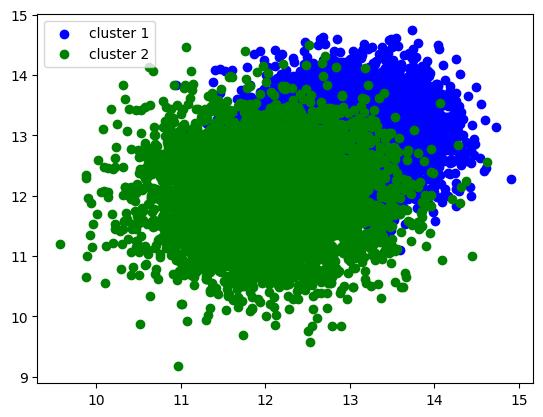

In [138]:
x1, y1 = make_blobs(8000, centers=1, cluster_std=0.5, center_box=(13,13))
x2, y2 = make_blobs(5000, centers=1, cluster_std=0.7, center_box=(12,12))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='cluster 1')
plt.scatter(x2[:, 0], x2[:, 1], color='green', label='cluster 2')
plt.legend()
plt.show()

In [139]:
gm = GaussianMixture(n_components=2).fit(x.reshape(-1, 1))
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [140]:
centers = gmm.means_
print(centers)

[[13.00322868]
 [11.89732952]]


In [141]:
pred = gm.predict(x.reshape(-1, 1))

In [142]:
plant1 = list(pred).count(0)/13000
plant2 = list(pred).count(1)/13000
print(f'Ймовірність, що деталь з першого заводу = {plant1}')
print(f'Ймовірність, що деталь з другого заводу = {plant2}')

Ймовірність, що деталь з першого заводу = 0.6996153846153846
Ймовірність, що деталь з другого заводу = 0.30038461538461536


### Висновок:

**Центри кластерів: 11.9 і 13.0.**

**Ймовірність, що деталь з першого заводу = 0.696**

**Ймовірність, що деталь з другого заводу = 0.304**